# Análise exploratória base Census Income.

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')

In [2]:
#carregando o dataset, o parâmetro header foi implemanetado devido as colunas não possuirem titulo
df = pd.read_csv("adult.csv", sep = ',', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Quantidade de linhas e colunas
df.shape

(32561, 15)

In [4]:
#Alterando o nomes das colunas
df.columns = ['Age', 'WorkClass', 'id', 'Education','EducationNum',
              'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex',
              'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income']
df.head()

,Age,WorkClass,id,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#verificando os tipos de dados
df.dtypes

Age               int64
WorkClass        object
id                int64
Education        object
EducationNum      int64
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Sex              object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
NativeCountry    object
Income           object
dtype: object

In [6]:
#convertendo a variável Income para fator 
df['Income'] = df['Income'].astype('category')
df.dtypes

Age                 int64
WorkClass          object
id                  int64
Education          object
EducationNum        int64
MaritalStatus      object
Occupation         object
Relationship       object
Race               object
Sex                object
CapitalGain         int64
CapitalLoss         int64
HoursPerWeek        int64
NativeCountry      object
Income           category
dtype: object

In [7]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Age              0
WorkClass        0
id               0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

### Percebe-se que o banco não tem nenhuma linha vazia, mas quando estava fazendo as análises iniciais nas colunas percebi que na coluna 'WorkClass' tinham algumas linhas com "?" que pode ser considerada como um valor missing. Assim resolvi verificar as outras colunas.

In [8]:
#Verificar apenas as colunas do tipo object
Columns = ['WorkClass', 'Education','MaritalStatus', 'Occupation', 'Relationship', 
           'Race', 'Sex', 'NativeCountry']
for i in df[Columns]:
	print(df.groupby(i)["id"].count().head())

WorkClass
 ?                1836
 Federal-gov       960
 Local-gov        2093
 Never-worked        7
 Private         22696
Name: id, dtype: int64
Education
 10th        933
 11th       1175
 12th        433
 1st-4th     168
 5th-6th     333
Name: id, dtype: int64
MaritalStatus
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10683
Name: id, dtype: int64
Occupation
 ?                  1843
 Adm-clerical       3770
 Armed-Forces          9
 Craft-repair       4099
 Exec-managerial    4066
Name: id, dtype: int64
Relationship
 Husband           13193
 Not-in-family      8305
 Other-relative      981
 Own-child          5068
 Unmarried          3446
Name: id, dtype: int64
Race
 Amer-Indian-Eskimo      311
 Asian-Pac-Islander     1039
 Black                  3124
 Other                   271
 White                 27816
Name: id, dtype: int64
Sex
 Female    10771
 Male      21790
Name: 

### Foi detectado nas colunas "WorkClass", "Occupation" e "NativeCountry" a string "?", que estamos considerando como um valor missing.

In [9]:
#Há maneira de tratamento escolhida nesse caso foi a substituição do sinal de ? por Unknown (desconhecido), e assim fica mais compreensivo as análises.

df['WorkClass'] = df['WorkClass'].str.replace('?','Unknown', regex=True)
df['Occupation'] = df['Occupation'].str.replace('?','Unknown', regex=True)
df['NativeCountry'] = df['NativeCountry'].str.replace('?','Unknown', regex=True)

### Feito o tratamento de dados, vamos para a análise exploratória de dados.

### Inicialmente , vamos traçar um perfil das pessoas que estão nesse censo

In [10]:
#Na idade já percebe-se que a média desse censo é de aproximadamente 37 anos e que 75% das pessoas nesse banco tem idade infeior ou igual a 48 anos
df['Age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

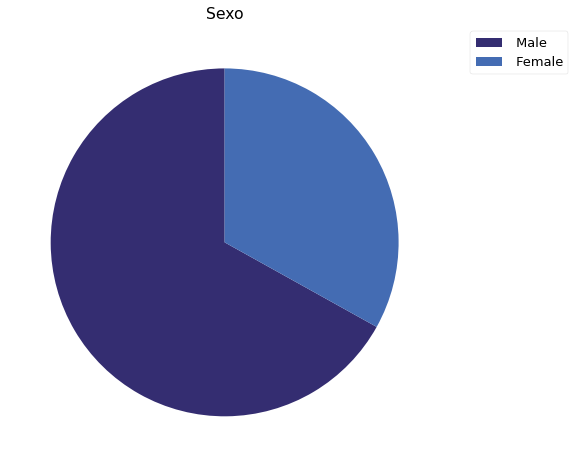

In [11]:
# A maioria (mais de 50%) desse banco é composto por pessoas do sexo masculino 

fig, ax = plt.subplots(figsize=(10, 8))
# Definindo a quantidade
labels = df.Sex.value_counts().index

# Gráfico de Pizza
fatias, texto = plt.pie(df.Sex.value_counts(), colors = ('#342d71', '#446cb3'), startangle = 90)
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Sexo")
plt.savefig('sexo.png', format='png')
plt.show()

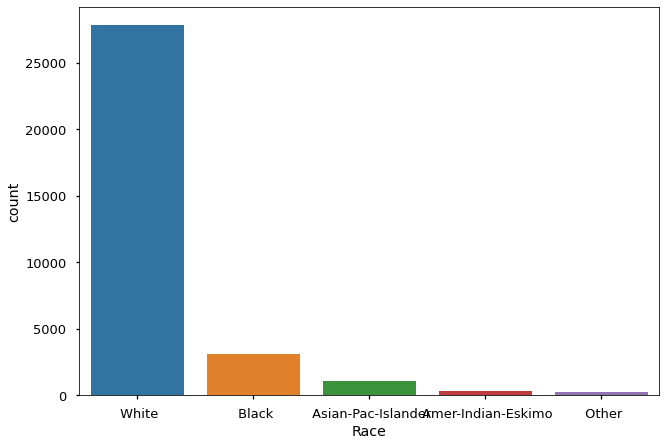

In [12]:
# A raça predominante é a branca com mais de 25 mil em um banco de dados que tem aproximadamente 33 mil observações.
sns.countplot(x='Race', data=df)
plt.savefig('race.png', format='png')

In [13]:
# O país de origem como esperado é predominante os Estados Unidos já que é um censo de lá e o segundo país mais frequente foi o Mexico
df['NativeCountry'].value_counts()

 United-States                 29170
 Mexico                          643
 Unknown                         583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [14]:
# A renda menor ou igual a 50 mil apresentou uma frequencia maior 
df['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [15]:
# Em média as pessoas desse censo trabalha 40 horas por semana, percebe-se também que maximo encontrado foi de 99 horas isso pode ser um outlier, vamos verificar mais a frente em um boxplot.
df['HoursPerWeek'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: HoursPerWeek, dtype: float64

### Assim podemos definir que o perfil desse censo foi: Pessoas com uma idade média de 38 anos, predominantemente masculina e branca de origem norte americana, trabalha em média 40 horas por semana e sua maioria tem uma renda infeior ou igual a 50 mil dolares anual.

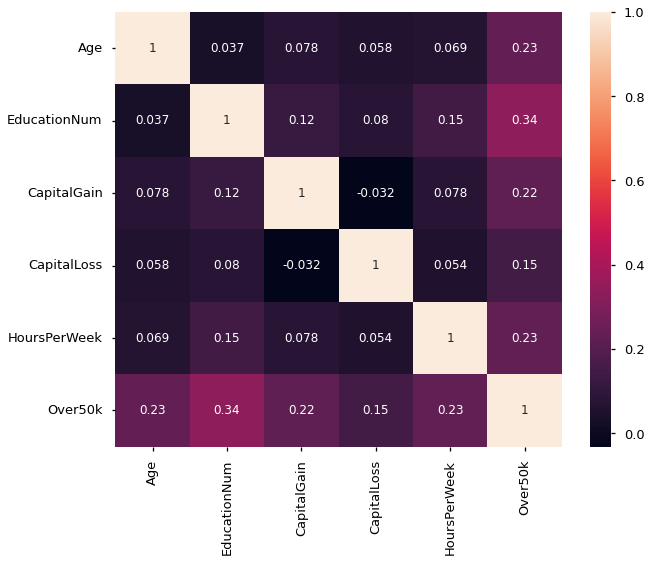

In [16]:
# Verificando as correlações das variáveis

# foi criado um sub set apenas com as variáveis numericas para coletar suas correlações
# A coluna Income foi transformada em uma nova coluna onde a renda maior que 50k virou 1 e a renda menor ou igual virou 0.
sub_set = df.drop(columns =['id', 'WorkClass', 'Education','MaritalStatus', 'Occupation', 'Relationship', 
           'Race', 'Sex', 'NativeCountry'] )
sub_set['Over50k'] = np.where(sub_set['Income'].str.contains('>50K'),1,0)
sub_set = sub_set.drop(columns = ['Income'])
df_corr = sub_set.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, annot_kws={"size": 12})
plt.savefig('corplot.png', format='png')

### A correlação é uma medida importante, pois nela podemos ver a relação entre as variáveis e assim poder aplicar técnicas de inferência e até preditivas sobre essas variáveis. As correlações apresentadas foram relativamente baixas, a que apresentou a maior correlação foi a variável educationum com a "Over50k" podemos inferir que quanto maior o nível de educação da pessoa maior será sua renda anual.

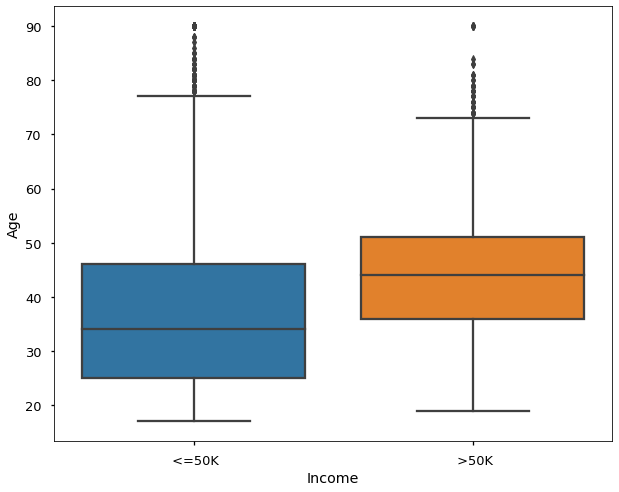

In [17]:
# Analisando agora a idade das pessoas relacionada com a renda
# Percebe-se a presença de alguns outliers, a mediana das pessoas com renda superior a 50k está acima da mediana com renda inferior ou igual a 50k.
# Logo pessoas com idade mais avançada é o grupo das pessoas que apresentam renda supeior a 50 k
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot( x=df["Income"], y=df["Age"] )
plt.savefig('boxplot.png', format='png')

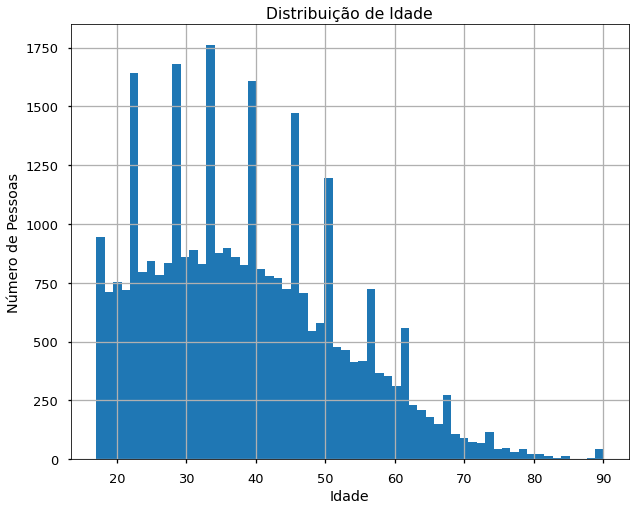

In [18]:
# No gráfico acima observamos a presença de alguns outliers
# Analisando o histograma das idades, percebe-se que a maioria está concentrada na população mais jovem e poucos com idade superior a 75 anos
# O gráfico lembra um pouco a imagem de uma distruibuição qui-quadrado, pode ser que a variável idade siga essa distribuição

# Gerando um histograma
fig, ax = plt.subplots(figsize=(10, 8))
df.Age.hist(bins = 60)
plt.xlabel("Idade")
plt.ylabel("Número de Pessoas")
plt.title("Distribuição de Idade")
plt.savefig('hist.png', format='png')
plt.show()

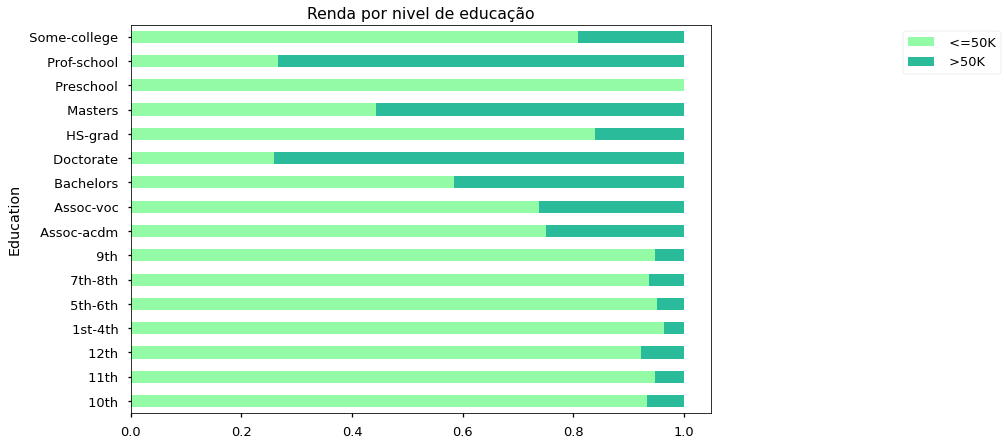

In [19]:
# Criando uma tabela com as proporções das variáveis educação e renda
df3 = pd.crosstab(df.Education, 
                  df.Income).apply(lambda r: r/r.sum(), axis=1)
# Gráfico de Barras (Stacked)
ax1 = df3.plot(kind = "barh", stacked = True, color = ('#93faa5', '#2abb9b'), title = "Renda por nivel de educação")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))
plt.savefig('educa.png', format='png')

### No heatmap vimos que educação e renda tinham uma correlação positiva, no Gráfico acima podemos ver a confirmação disso, onde pessoas com doutorado ou professores de escola foram que as maiores proporções com renda superior a 50 mil anuais.

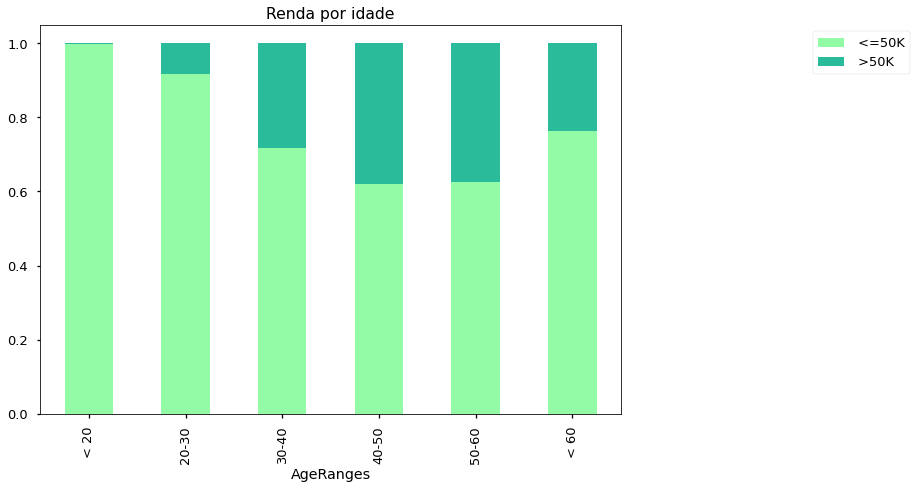

In [20]:
# Criando um dataframe com uma coluna nova com a faixa etária das pessoas
# Agrupando os dados
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], 
                                   bins, 
                                   labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

df2 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.Income).apply(lambda r: r/r.sum(), axis=1)

# Gráfico de Barras (Stacked)
ax1 = df2.plot(kind = "bar", stacked = True, color = ('#93faa5', '#2abb9b'), title = "Renda por idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))
plt.savefig('barrenda.png', format='png')

### No boxplot da idade por renda percebemos que pessoas mais velhas era o grupo que predominava as pessoas com renda superior a 50 k. Nesse gráfico de barras podemos ver que os grupos que apresentaram as maiores proporções de pessoas com renda acima de 50 mil anuais foram as pessoas com 40 a 50 anos e 50 a 60 anos 

In [21]:
#Criando uma tabela para obter a média de uma variável em relação a outra
pivot = pd.pivot_table(df, index = 'Race', values = 'CapitalGain', aggfunc = 'mean')

# Ordenando a tabela pelo CapitalGain
pivot.sort_values('CapitalGain', ascending=False)

,CapitalGain
Race,
Asian-Pac-Islander,1478.358037
White,1121.660375
Other,934.660517
Amer-Indian-Eskimo,625.266881
Black,609.940461


### Na tabela acima percebe-se que as maiores médias de capital ganho está entre as pessoas brancas e asiaticas, a média mais baixa é das pessoas negras

# Fim da análise exploratória